In [27]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Вызов библиотек                                                                       #
#------------------------------------------------------------------------------------------------------------------------------#

import numpy as np
import matplotlib as mb
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import scipy as sp
from scipy import stats

In [42]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Загрузка датафрейма                                                                  #
#------------------------------------------------------------------------------------------------------------------------------#

import os
ROOT_DIR = os.path.realpath(os.path.join(os.path.dirname('data'), '..'))

dataset_US = pd.read_csv(os.path.join(ROOT_DIR, 'data', 'data_usa.xlsx')), delimiter = ';', decimal = ',')
dataset_US = pd.DataFrame(dataset_US)
dataset_US

,Date,Overall Traded volume USA -dollars,PartRate,Retail volumes -dollars,Retail volumes -billion dollars,ln (Retail volumes),VIX,Unemployment rate,Index Return,Fin Literacy,...,After Capital Gain tax,After Capital Gain tax total,Dividends monthly,Dividend tax,After Dividend tax,Total Gain,Comission (for trading),Comissions paid,Comissions paid total,Cost To Trade total
0,01.02.2021,1.135068e+13,"19,50%",2.213382e+12,2213.38,7.70,30.24,0.06,0.02,1.0,...,56.418827,56.418827,4.0,0.88,3.12,59.538827,"0,00%",0.000000,0.000000,57.298827
1,04.01.2021,1.179530e+13,"19,50%",2.300083e+12,2300.08,7.74,26.97,0.06,0.01,1.0,...,29.883334,29.883334,4.0,0.88,3.12,33.003334,"0,00%",0.000000,0.000000,30.763334
2,01.12.2020,1.091668e+13,"19,50%",2.128752e+12,2128.75,7.66,20.77,0.07,0.10,1.0,...,291.201489,291.201489,4.0,0.88,3.12,294.321489,"0,00%",0.000000,0.000000,292.081489
3,02.11.2020,1.026411e+13,"19,50%",2.001501e+12,2001.50,7.60,37.13,0.07,-0.02,1.0,...,-60.744020,0.000000,4.0,0.88,3.12,-57.624020,"0,00%",0.000000,0.000000,0.880000
4,01.10.2020,9.523329e+12,"19,50%",1.857049e+12,1857.05,7.53,26.70,0.07,-0.04,1.0,...,-121.639807,0.000000,4.0,0.88,3.12,-118.519807,"0,00%",0.000000,0.000000,0.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,01.05.2013,5.049741e+12,"12,00%",6.059689e+11,605.97,6.41,14.49,0.08,0.01,0.0,...,37.602343,37.602343,4.0,0.76,3.24,40.842343,"5,00%",2.042117,2.042117,40.404460
94,01.04.2013,4.980839e+12,"12,00%",5.977007e+11,597.70,6.39,13.58,0.08,0.03,0.0,...,82.225318,82.225318,4.0,0.76,3.24,85.465318,"5,00%",4.273266,4.273266,87.258584
95,01.03.2013,4.205203e+12,"12,00%",5.046243e+11,504.62,6.22,15.36,0.08,0.00,0.0,...,9.557668,9.557668,4.0,0.76,3.24,12.797668,"5,00%",0.639883,0.639883,10.957551
96,01.02.2013,4.339547e+12,"12,00%",5.207456e+11,520.75,6.26,12.90,0.08,0.03,0.0,...,98.248868,98.248868,4.0,0.76,3.24,101.488868,"5,00%",5.074443,5.074443,104.083311


In [43]:
dataset_US = dataset_US.drop (dataset_US.tail (1) .index)
dataset_US

,Date,Overall Traded volume USA -dollars,PartRate,Retail volumes -dollars,Retail volumes -billion dollars,ln (Retail volumes),VIX,Unemployment rate,Index Return,Fin Literacy,...,After Capital Gain tax,After Capital Gain tax total,Dividends monthly,Dividend tax,After Dividend tax,Total Gain,Comission (for trading),Comissions paid,Comissions paid total,Cost To Trade total
0,01.02.2021,1.135068e+13,"19,50%",2.213382e+12,2213.38,7.70,30.24,0.06,0.02,1.0,...,56.418827,56.418827,4.0,0.88,3.12,59.538827,"0,00%",0.000000,0.000000,57.298827
1,04.01.2021,1.179530e+13,"19,50%",2.300083e+12,2300.08,7.74,26.97,0.06,0.01,1.0,...,29.883334,29.883334,4.0,0.88,3.12,33.003334,"0,00%",0.000000,0.000000,30.763334
2,01.12.2020,1.091668e+13,"19,50%",2.128752e+12,2128.75,7.66,20.77,0.07,0.10,1.0,...,291.201489,291.201489,4.0,0.88,3.12,294.321489,"0,00%",0.000000,0.000000,292.081489
3,02.11.2020,1.026411e+13,"19,50%",2.001501e+12,2001.50,7.60,37.13,0.07,-0.02,1.0,...,-60.744020,0.000000,4.0,0.88,3.12,-57.624020,"0,00%",0.000000,0.000000,0.880000
4,01.10.2020,9.523329e+12,"19,50%",1.857049e+12,1857.05,7.53,26.70,0.07,-0.04,1.0,...,-121.639807,0.000000,4.0,0.88,3.12,-118.519807,"0,00%",0.000000,0.000000,0.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,03.06.2013,5.077340e+12,"12,00%",6.092808e+11,609.28,6.41,16.28,0.08,0.04,0.0,...,103.161765,103.161765,4.0,0.76,3.24,106.401765,"5,00%",5.320088,5.320088,109.241853
93,01.05.2013,5.049741e+12,"12,00%",6.059689e+11,605.97,6.41,14.49,0.08,0.01,0.0,...,37.602343,37.602343,4.0,0.76,3.24,40.842343,"5,00%",2.042117,2.042117,40.404460
94,01.04.2013,4.980839e+12,"12,00%",5.977007e+11,597.70,6.39,13.58,0.08,0.03,0.0,...,82.225318,82.225318,4.0,0.76,3.24,85.465318,"5,00%",4.273266,4.273266,87.258584
95,01.03.2013,4.205203e+12,"12,00%",5.046243e+11,504.62,6.22,15.36,0.08,0.00,0.0,...,9.557668,9.557668,4.0,0.76,3.24,12.797668,"5,00%",0.639883,0.639883,10.957551


In [44]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Декларирования переменных                                                                 #
#------------------------------------------------------------------------------------------------------------------------------#

Cost_to_trade = dataset_US["Cost To Trade total"]
Fin_lit = dataset_US["Fin Literacy"]
Infl = dataset_US["Infl"]
Int_rate = dataset_US["Int rate"]
Deriv = dataset_US["Der Turnover"]
GDP = dataset_US["GDP growth"]
Marg_Trade = dataset_US["Marginal Trading"]
Return = dataset_US["Index Return"]
Unempl = dataset_US["Unemployment rate"]
VIX = dataset_US["VIX"]
ln_retail_volumes = dataset_US["ln (Retail volumes)"]

In [45]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Создание датасета для США                                                                   #
#------------------------------------------------------------------------------------------------------------------------------#

series_1 = pd.Series([ln_retail_volumes, Return, Unempl, VIX, Marg_Trade, GDP, Deriv, Infl, Int_rate, Fin_lit, Cost_to_trade])
series_1

0     0     7.70
1     7.74
2     7.66
3     7.60
4 ...
1     0     0.02
1     0.01
2     0.10
3    -0.02
4 ...
2     0     0.06
1     0.06
2     0.07
3     0.07
4 ...
3     0     30.24
1     26.97
2     20.77
3     37.1...
4     0     1.0
1     1.0
2     1.0
3     1.0
4     ...
5     0     0.065
1     0.065
2     0.043
3     0.04...
6     0     2894627.0
1     2894627.0
2     2696624....
7     0     0.0043
1     0.0055
2     0.0009
3    -0...
8     0     0.0007
1     0.0008
2     0.0009
3     0...
9     0     1.0
1     1.0
2     1.0
3     1.0
4     ...
10    0      57.298827
1      30.763334
2     292.08...
dtype: object

In [46]:
frame_1 = {'ln_retail_volumes' : ln_retail_volumes, 'VIX' : VIX, 'Cost_to_trade' : Cost_to_trade, 'Unempl' : Unempl, 
        'GDP' : GDP, 'Fin_lit' : Fin_lit, 'Marg_Trade' : Marg_Trade, 'Return' : Return, 'Infl' : Infl, 'Int_rate' : Int_rate,
         'Deriv' : Deriv}
new_data_US = pd.DataFrame(frame_1)
new_data_US

,ln_retail_volumes,VIX,Cost_to_trade,Unempl,GDP,Fin_lit,Marg_Trade,Return,Infl,Int_rate,Deriv
0,7.70,30.24,57.298827,0.06,0.065,1.0,1.0,0.02,0.0043,0.0007,2894627.0
1,7.74,26.97,30.763334,0.06,0.065,1.0,1.0,0.01,0.0055,0.0008,2894627.0
2,7.66,20.77,292.081489,0.07,0.043,1.0,1.0,0.10,0.0009,0.0009,2696624.0
3,7.60,37.13,0.880000,0.07,0.043,1.0,1.0,-0.02,-0.0006,0.0009,2879377.0
4,7.53,26.70,0.880000,0.07,0.043,1.0,1.0,-0.04,0.0004,0.0009,2203521.0
...,...,...,...,...,...,...,...,...,...,...,...
92,6.41,16.28,109.241853,0.08,0.005,0.0,0.0,0.04,0.0024,0.0009,3082222.0
93,6.41,14.49,40.404460,0.08,0.005,0.0,0.0,0.01,0.0018,0.0009,2643380.0
94,6.39,13.58,87.258584,0.08,0.005,0.0,0.0,0.03,-0.0010,0.0011,2568009.0
95,6.22,15.36,10.957551,0.08,0.036,0.0,0.0,0.00,0.0026,0.0015,3351551.0


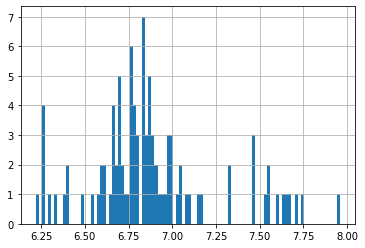

In [48]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Построение гистограмм для переменных                                                               #
#------------------------------------------------------------------------------------------------------------------------------#


new_data_US['ln_retail_volumes'].hist(bins=100)

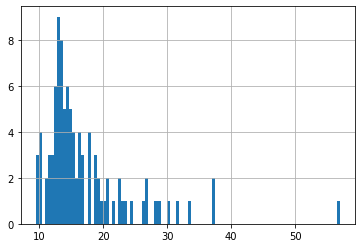

In [49]:
new_data_US['VIX'].hist(bins=100)

In [50]:
ln_VIX = np.log(VIX)

0     3.409166
1     3.294725
2     3.033510
3     3.614425
4     3.284664
        ...   
92    2.789937
93    2.673459
94    2.608598
95    2.731767
96    2.557227
Name: VIX, Length: 97, dtype: float64

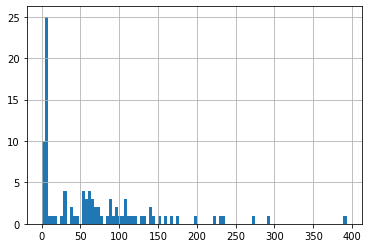

In [51]:
new_data_US['Cost_to_trade'].hist(bins=100)

In [52]:
ln_Cost_to_trade = np.log(Cost_to_trade)

0     4.048280
1     3.426324
2     5.677033
3    -0.127833
4    -0.127833
        ...   
92    4.693564
93    3.698940
94    4.468876
95    2.394029
96    4.645192
Name: Cost To Trade total, Length: 97, dtype: float64

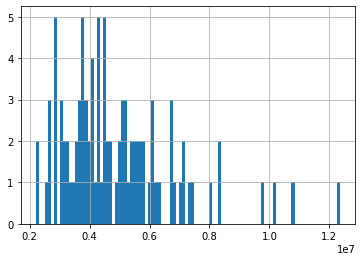

In [53]:
new_data_US['Deriv'].hist(bins=100)

In [54]:
ln_Deriv = np.log(Deriv)

0     14.878367
1     14.878367
2     14.807511
3     14.873085
4     14.605567
        ...    
92    14.941161
93    14.787569
94    14.758641
95    15.024934
96    14.810472
Name: Der Turnover, Length: 97, dtype: float64

In [55]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Датасет для США с логарифмическими преобразованиями                                                                 #
#------------------------------------------------------------------------------------------------------------------------------#


new_data_US['ln_Deriv'] = ln_Deriv
new_data_US['ln_Cost_to_trade'] = ln_Cost_to_trade
new_data_US['ln_VIX'] = ln_VIX
new_data_US

,ln_retail_volumes,VIX,Cost_to_trade,Unempl,GDP,Fin_lit,Marg_Trade,Return,Infl,Int_rate,Deriv,ln_Deriv,ln_Cost_to_trade,ln_VIX
0,7.70,30.24,57.298827,0.06,0.065,1.0,1.0,0.02,0.0043,0.0007,2894627.0,14.878367,4.048280,3.409166
1,7.74,26.97,30.763334,0.06,0.065,1.0,1.0,0.01,0.0055,0.0008,2894627.0,14.878367,3.426324,3.294725
2,7.66,20.77,292.081489,0.07,0.043,1.0,1.0,0.10,0.0009,0.0009,2696624.0,14.807511,5.677033,3.033510
3,7.60,37.13,0.880000,0.07,0.043,1.0,1.0,-0.02,-0.0006,0.0009,2879377.0,14.873085,-0.127833,3.614425
4,7.53,26.70,0.880000,0.07,0.043,1.0,1.0,-0.04,0.0004,0.0009,2203521.0,14.605567,-0.127833,3.284664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,6.41,16.28,109.241853,0.08,0.005,0.0,0.0,0.04,0.0024,0.0009,3082222.0,14.941161,4.693564,2.789937
93,6.41,14.49,40.404460,0.08,0.005,0.0,0.0,0.01,0.0018,0.0009,2643380.0,14.787569,3.698940,2.673459
94,6.39,13.58,87.258584,0.08,0.005,0.0,0.0,0.03,-0.0010,0.0011,2568009.0,14.758641,4.468876,2.608598
95,6.22,15.36,10.957551,0.08,0.036,0.0,0.0,0.00,0.0026,0.0015,3351551.0,15.024934,2.394029,2.731767


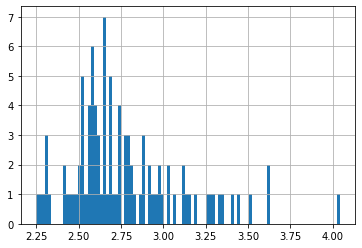

In [56]:
new_data_US['ln_VIX'].hist(bins=100)

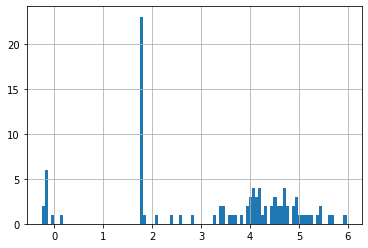

In [57]:
new_data_US['ln_Cost_to_trade'].hist(bins=100)

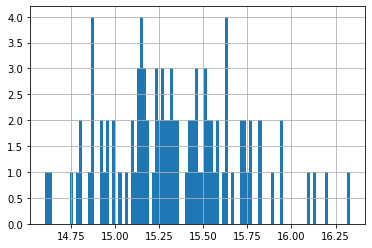

In [58]:
new_data_US['ln_Deriv'].hist(bins=100)

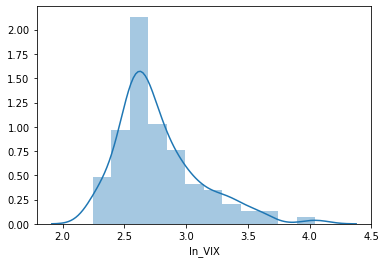

In [59]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Визуальный анализ распределения переменных                                                                   #
#------------------------------------------------------------------------------------------------------------------------------#


sns_plot = sns.distplot(new_data_US['ln_VIX'])
fig = sns_plot.get_figure()

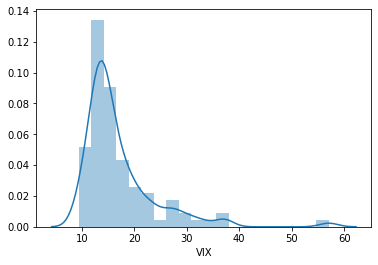

In [60]:
sns_plot = sns.distplot(new_data_US['VIX'])
fig = sns_plot.get_figure()

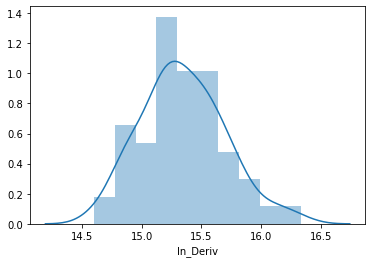

In [61]:
sns_plot = sns.distplot(new_data_US['ln_Deriv'])
fig = sns_plot.get_figure()

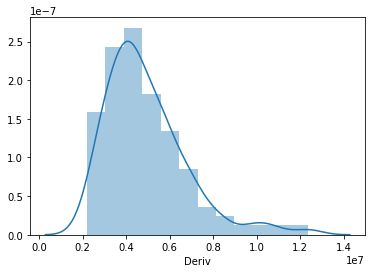

In [62]:
sns_plot = sns.distplot(new_data_US['Deriv'])
fig = sns_plot.get_figure()

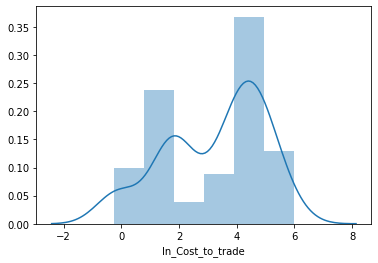

In [63]:
sns_plot = sns.distplot(new_data_US['ln_Cost_to_trade'])
fig = sns_plot.get_figure()

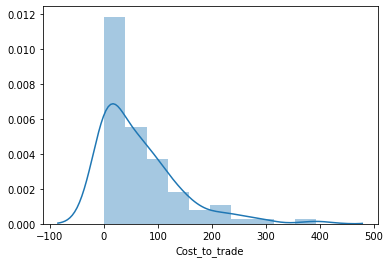

In [64]:
sns_plot = sns.distplot(new_data_US['Cost_to_trade'])
fig = sns_plot.get_figure()

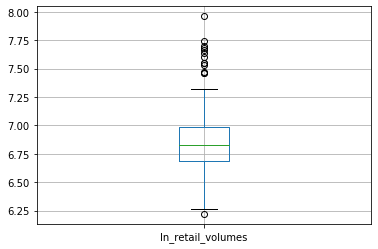

In [65]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Выявление выбросов                                                                    #
#------------------------------------------------------------------------------------------------------------------------------#


new_data_US.boxplot(column=['ln_retail_volumes'])

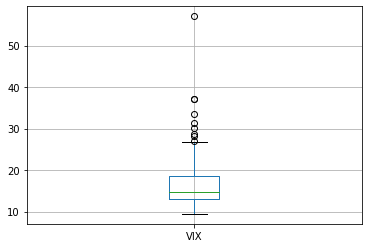

In [429]:
new_data_US.boxplot(column=['VIX'])

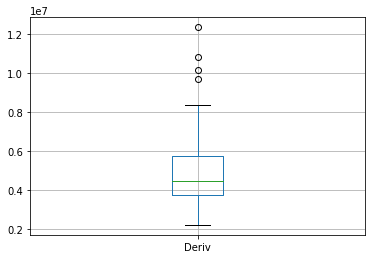

In [430]:
new_data_US.boxplot(column=['Deriv'])

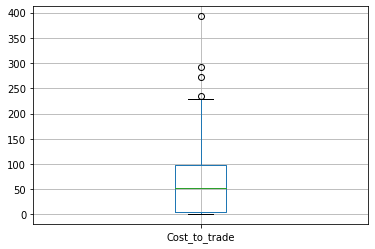

In [431]:
new_data_US.boxplot(column=['Cost_to_trade'])

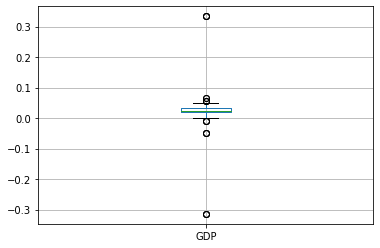

In [69]:
new_data_US.boxplot(column=['GDP'])

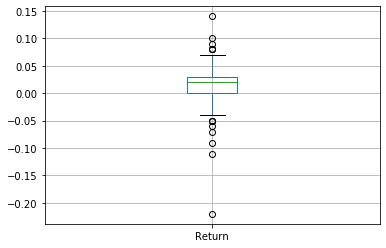

In [70]:
new_data_US.boxplot(column=['Return'])

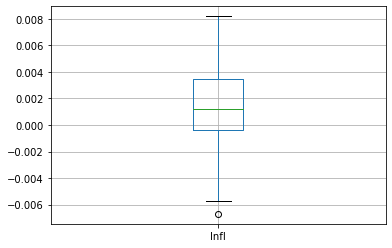

In [71]:
new_data_US.boxplot(column=['Infl'])

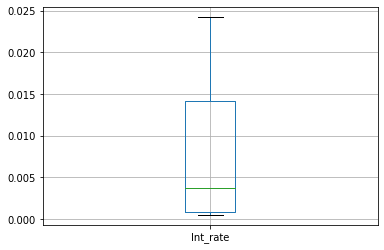

In [72]:
new_data_US.boxplot(column=['Int_rate'])

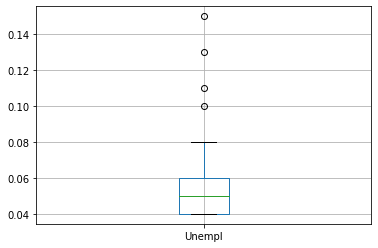

In [73]:
new_data_US.boxplot(column=['Unempl'])

In [411]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                       Построение регрессионной модели для США                                                #
#------------------------------------------------------------------------------------------------------------------------------#


Y = new_data_US['ln_retail_volumes'] 
X = new_data_US[['VIX', 'Cost_to_trade', 'GDP', 'Fin_lit', 'Marg_Trade', 'Return', 'Infl', 'Int_rate',
         'Deriv', 'Unempl']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

C:\Users\peter\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     31.82
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           8.84e-25
Time:                        18:05:52   Log-Likelihood:                 36.019
No. Observations:                  97   AIC:                            -50.04
Df Residuals:                      86   BIC:                            -21.72
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1223      0.149     41.106      0.000       5.826       6.418
VIX               0.0359      0.005      6.592      0.000       0.025       0.047
Cost_to_trade    -0.0007      0.001     -1.308      0.194      -0.002       0.000
GDP               0.0231      0.257      0.090      0.929      -0.487       0.533
Fin_lit           0.4089      0.067      6.061      0.000       0.275       0.543
Marg_Trade        0.3048      0.100      3.043      0.003       0.106       0.504
Return            3.0021      1.006      2.984      0.004       1.002       5.002
Infl              1.7421      6.971      0.250      0.803     -12.117      15.601
Int_rate          4.7390      3.488      1.359      0.178      -2.194      11.672
Deriv         -3.055e-08   1.21e-08     -2.523      0.013   -5.46e-08   -6.48e-09
Unempl           -1.7133      1.988     -0.862      0.391      -5.665       2.239
==============================================================================
Omnibus:                       13.081   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.917
Skew:                           0.860   Prob(JB):                     0.000951
Kurtosis:                       3.694   Cond. No.                     2.04e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [420]:
Y = new_data_US['ln_retail_volumes'] 
X = new_data_US[['ln_VIX', 'ln_Cost_to_trade', 'GDP', 'Fin_lit', 'Marg_Trade', 'Return', 'Infl', 'Int_rate',
         'ln_Deriv', 'Unempl']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     28.86
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           2.13e-23
Time:                        18:51:14   Log-Likelihood:                 32.334
No. Observations:                  97   AIC:                            -42.67
Df Residuals:                      86   BIC:                            -14.35
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.3092      1.142      7.276      0.000       6.039      10.579
ln_VIX               0.5295      0.093      5.703      0.000       0.345       0.714
ln_Cost_to_trade     0.0079      0.019      0.417      0.678      -0.030       0.045
GDP                 -0.1040      0.261     -0.399      0.691      -0.623       0.415
Fin_lit              0.5184      0.068      7.667      0.000       0.384       0.653
Marg_Trade           0.3338      0.105      3.191      0.002       0.126       0.542
Return               1.0307      0.712      1.447      0.151      -0.385       2.447
Infl                 0.0449      7.161      0.006      0.995     -14.190      14.280
Int_rate             3.7727      3.633      1.039      0.302      -3.449      10.994
ln_Deriv            -0.2242      0.070     -3.190      0.002      -0.364      -0.084
Unempl               0.2566      1.824      0.141      0.888      -3.369       3.882
==============================================================================
Omnibus:                       20.856   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.823
Skew:                           1.087   Prob(JB):                     1.50e-06
Kurtosis:                       4.382   Cond. No.                     6.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [412]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                       Проыверка на мультиколлинеарность                                                                 #
#------------------------------------------------------------------------------------------------------------------------------#


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,68.475118,const
1,4.659595,VIX
2,5.330270,Cost_to_trade
3,1.396029,GDP
4,1.630969,Fin_lit
5,1.796645,Marg_Trade
6,6.467534,Return
7,1.237922,Infl
8,2.464645,Int_rate
9,1.572682,Deriv


In [78]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Проверка на линейность                                                                  #
#------------------------------------------------------------------------------------------------------------------------------#


def linearity_test(model, y):
    
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=10)
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    
    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=10)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

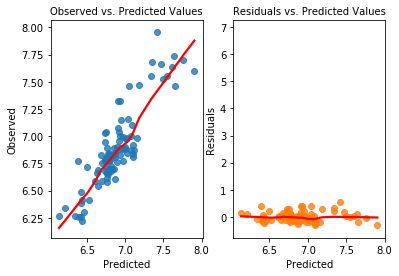

In [415]:
linearity_test(model, Y)

In [89]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                       Проверка предпосылки о нулевом математическом ожидании остатков                                                                   #
#------------------------------------------------------------------------------------------------------------------------------#


model.resid.mean()

1.1463911149119142e-14

0.94977748724929

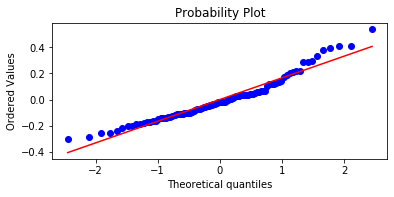

In [99]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Проерка на нормальность остатков                                                                   #
#------------------------------------------------------------------------------------------------------------------------------#


fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(model.resid, plot=ax, fit=True)
r**2

In [100]:
shapiro_test = stats.shapiro(model.resid)
shapiro_test

(0.949722945690155, 0.000980587094090879)

In [101]:
jb = stats.jarque_bera(model.resid)
jb

(13.916575847387596, 0.0009507228920910826)

In [102]:
new_data_US

,ln_retail_volumes,VIX,Cost_to_trade,Unempl,GDP,Fin_lit,Marg_Trade,Return,Infl,Int_rate,Deriv,ln_Deriv,ln_Cost_to_trade,ln_VIX
0,7.70,30.24,57.298827,0.06,0.065,1.0,1.0,0.02,0.0043,0.0007,2894627.0,14.878367,4.048280,3.409166
1,7.74,26.97,30.763334,0.06,0.065,1.0,1.0,0.01,0.0055,0.0008,2894627.0,14.878367,3.426324,3.294725
2,7.66,20.77,292.081489,0.07,0.043,1.0,1.0,0.10,0.0009,0.0009,2696624.0,14.807511,5.677033,3.033510
3,7.60,37.13,0.880000,0.07,0.043,1.0,1.0,-0.02,-0.0006,0.0009,2879377.0,14.873085,-0.127833,3.614425
4,7.53,26.70,0.880000,0.07,0.043,1.0,1.0,-0.04,0.0004,0.0009,2203521.0,14.605567,-0.127833,3.284664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,6.41,16.28,109.241853,0.08,0.005,0.0,0.0,0.04,0.0024,0.0009,3082222.0,14.941161,4.693564,2.789937
93,6.41,14.49,40.404460,0.08,0.005,0.0,0.0,0.01,0.0018,0.0009,2643380.0,14.787569,3.698940,2.673459
94,6.39,13.58,87.258584,0.08,0.005,0.0,0.0,0.03,-0.0010,0.0011,2568009.0,14.758641,4.468876,2.608598
95,6.22,15.36,10.957551,0.08,0.036,0.0,0.0,0.00,0.0026,0.0015,3351551.0,15.024934,2.394029,2.731767


In [31]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Проверка на гетероскедастичность                                                                   #
#------------------------------------------------------------------------------------------------------------------------------#


def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  2.553897
p-value                        0.990067
f-value                        0.228576
f p-value                      0.992597

 Goldfeld-Quandt test ----
                value
F statistic  0.854436
p-value      0.668443

 Residuals plots ----


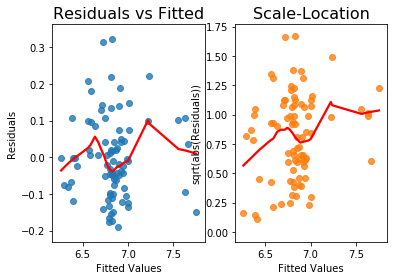

In [32]:
homoscedasticity_test(model)

In [35]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Построение регрессии для США со стандартными ошибками в форме Уайта                                                                 #
#------------------------------------------------------------------------------------------------------------------------------#

model_w_o = sm.OLS(Y, X).fit(cov_type='HC0')
predictions = model_w_o.predict(X)
model_w_o.summary()

C:\Users\peter\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\peter\Anaconda3\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     82.31
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           2.76e-34
Time:                        11:20:32   Log-Likelihood:                 63.949
No. Observations:                  83   AIC:                            -105.9
Df Residuals:                      72   BIC:                            -79.29
Df Model:                          10                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8277      0.202     33.818      0.000       6.432       7.223
VIX               0.0105      0.005      2.216      0.027       0.001       0.020
Cost_to_trade    -0.0003      0.000     -0.528      0.598      -0.001       0.001
GDP              -4.5930      1.031     -4.457      0.000      -6.613      -2.573
Fin_lit           0.2074      0.084      2.462      0.014       0.042       0.372
Marg_Trade        1.0006      0.112      8.895      0.000       0.780       1.221
Return            0.4315      0.956      0.451      0.652      -1.443       2.306
Infl              2.3086      4.960      0.465      0.642      -7.413      12.030
Int_rate          4.5938      2.913      1.577      0.115      -1.116      10.304
Deriv          1.203e-08   1.35e-08      0.893      0.372   -1.44e-08    3.84e-08
Unempl           -7.2526      2.714     -2.672      0.008     -12.572      -1.933
==============================================================================
Omnibus:                        5.849   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.501
Skew:                           0.628   Prob(JB):                       0.0639
Kurtosis:                       3.113   Cond. No.                     1.86e+09
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
shapiro_test = stats.shapiro(model_w_o.resid)
shapiro_test

(0.9662619829177856, 0.02805459313094616)

In [37]:
vif_w_o = pd.DataFrame()
vif_w_o["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_w_o["features"] = X.columns
vif_w_o

,VIF Factor,features
0,295.791372,const
1,3.394636,VIX
2,5.790186,Cost_to_trade
3,1.449302,GDP
4,4.687804,Fin_lit
5,4.504948,Marg_Trade
6,6.615761,Return
7,1.058133,Infl
8,4.111579,Int_rate
9,2.456340,Deriv


C:\Users\peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


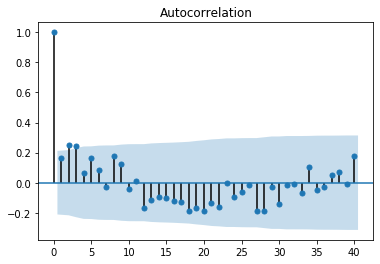

In [189]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Проверка на автокорреляцию в остатках                                                            #
#------------------------------------------------------------------------------------------------------------------------------#

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model_w_o.resid, lags=40 , alpha=0.05)
acf.show()

In [190]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Проверка на корреляцию между регрессороми и оишбками                                                                 #
#------------------------------------------------------------------------------------------------------------------------------#

from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], model_w_o.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')


Variable: const --- correlation: nan, p-value: nan
Variable: VIX --- correlation: -0.0000, p-value: 1.0000
Variable: Cost_to_trade --- correlation: -0.0000, p-value: 1.0000
Variable: GDP --- correlation: 0.0000, p-value: 1.0000
Variable: Fin_lit --- correlation: 0.0000, p-value: 1.0000
Variable: Marg_Trade --- correlation: -0.0000, p-value: 1.0000
Variable: Return --- correlation: -0.0000, p-value: 1.0000
Variable: Infl --- correlation: -0.0000, p-value: 1.0000
Variable: Int_rate --- correlation: -0.0000, p-value: 1.0000
Variable: Deriv --- correlation: 0.0000, p-value: 1.0000
Variable: Unempl --- correlation: 0.0000, p-value: 1.0000


C:\Users\peter\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


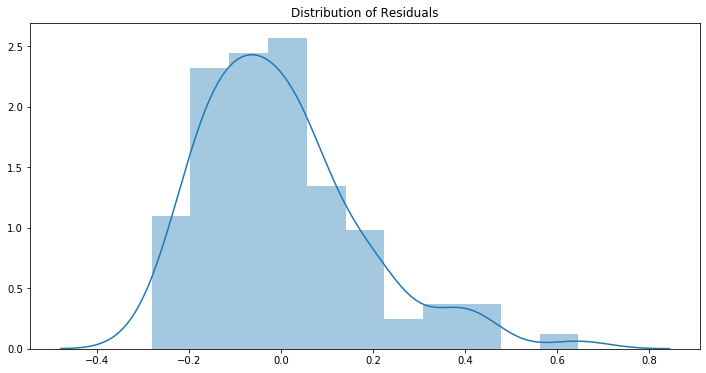

In [421]:
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(model.resid)
plt.show()